In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopy as gp
from geopy import distance

# Learning a few tricks with network X as warm up 

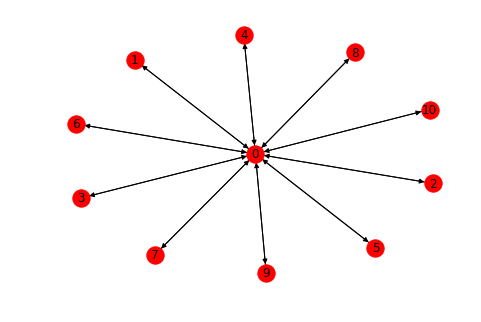

In [2]:
graph = nx.star_graph(10)
graph = graph.to_directed()
nx.draw(graph,with_labels=True)
plt.show()

In [3]:
# graph.remove_edge(0,1)
# nx.draw(graph,with_labels=True)
# plt.show()

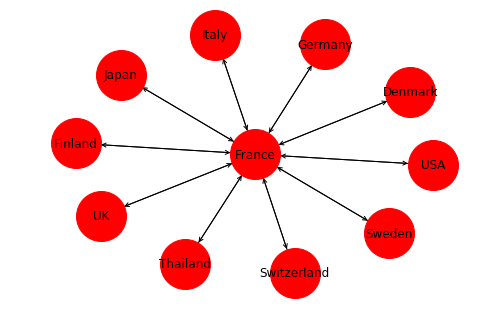

In [4]:
xs = ["France","Italy","Switzerland","Germany","Denmark","UK","Sweden","Finland","Thailand","USA","Japan"]
mapping = dict(zip(range(len(xs)),xs))
test = nx.relabel_nodes(graph,mapping)
nx.draw(test,with_labels=True,node_size=2500,arrowstyle='->')
plt.show()

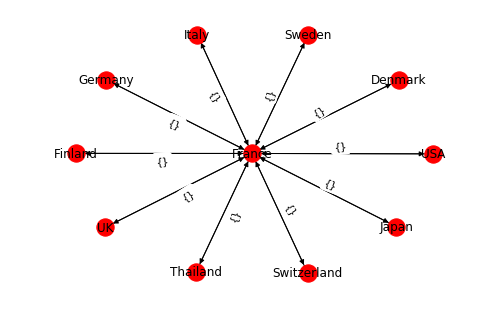

In [5]:


nx.draw(test,nx.spring_layout(test),with_labels=True)
nx.draw_networkx_edge_labels(test,nx.spring_layout(test))


plt.show()

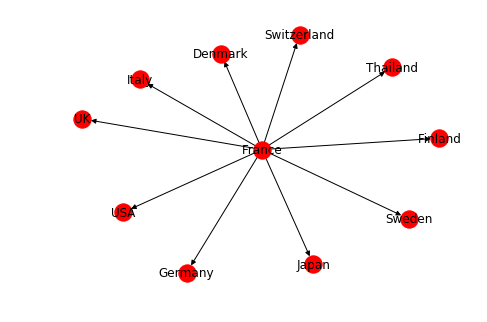

In [6]:
g = nx.DiGraph()
i = 1
g.add_star(mapping.values(),weight=3,length=i)

edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in g.edges(data=True)])
# nx.draw_networkx_edge_labels(g,pos=nx.spring_layout(g),edge_labels=edge_labels)
nx.draw(g,pos=nx.spring_layout(g),with_labels=True)
plt.show()

In [9]:
g.nodes

NodeView(('France', 'Italy', 'Switzerland', 'Germany', 'Denmark', 'UK', 'Sweden', 'Finland', 'Thailand', 'USA', 'Japan'))

# Food origin network graphs

In [10]:
food_origins = pd.read_csv('data/food_origins.csv')
food_origins.set_index('code')

,origins_tags,origins_tags.1,manufacturing_places_tags
code,,,
0000000020114,NaN,NaN,france
0000000274722,france,france,france
0000000290616,quebec,quebec,brossard-quebec
0000000394710,quebec,quebec,brossard-quebec
0000001071894,france,france,united-kingdom
0000001938067,quebec,quebec,brossard-quebec
0000004302544,quebec,quebec,"brossard,quebec"
0000007020254,NaN,NaN,etats-unis
0000007730009,NaN,NaN,"france,avranches"


In [11]:
data = pd.read_csv('data/cleaned_unique_index.csv',low_memory=False)
data.set_index('code',inplace=True)
data.head()

,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
code,,,,,,,,,,,,,,,,,,,,,
0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
list(data.columns)

['url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags'

In [30]:
# Get the products from france. 
origins_france = data['France' == data['countries_en']][['origins']]
origins_france.dropna().head()

,origins
code,
0000000274722,France
0000020004552,France
0000034152010,France
00003100,France
000039365,UE


In [33]:
# This does a flatmap. 
z = origins_france["origins"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
z = z.reset_index().set_index('code')
z.columns = ['','origins']
origins_split = z[['origins']]
origins_split.head()

,origins
code,
0000000274722,France
0000020004552,France
0000034152010,France
00003100,France
000039365,UE


In [37]:
# group by count and also we excludea few parasitic categories..
grouped = origins_split['origins'].value_counts().to_frame()
grouped.columns=['count']
# what to exclude. 
exclude = ['Union Européenne','Union européenne','Hors France','Hors Union Européenne','Sud-Ouest','hors-france','normandie','hors-union-europeenne','agriculture-ue-non-ue','union-europeenne','bretagne']
for e in exclude : 
    grouped = grouped[grouped.index != e]
top15 = grouped.nlargest(15,'count')
top15

,count
France,14482
Espagne,1025
Italie,1000
Bretagne,332
Pérou,330
Norvège,280
Allemagne,243
Chine,219
Normandie,214
Belgique,199


# Visualization 

In [38]:
import matplotlib as mpl
import math
def do_star_graph_series(series,node_color='pink',font_color='black',mode='node',title='',save_under=''):
    labs = ['']+list(series.index)
    labs = dict(zip(labs,labs))
    g = nx.DiGraph()
    i = 1
    g.add_star(['']+list(series.index))

    pos = nx.layout.spring_layout(g)

    if mode=='both':
        
        node_sizes = [100]+list(series.values.ravel())
        edge_colors =list(map(math.log,series.values.ravel()))    
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)

    # edge_colors=range(2,g.number_of_edges()+2 )
    elif mode=='edge':
        edge_colors =list(map(math.log,series.values.ravel()))
        nodes = nx.draw_networkx_nodes(g,pos,node_color=node_color)
        node_sizes = [100]+list(series.values.ravel())

        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2,edge_cmap = plt.cm.winter,edge_color=edge_colors)
        pc = mpl.collections.PatchCollection(edges,cmap=plt.cm.winter)
        pc.set_array(edge_colors)
        plt.colorbar(pc)
    elif mode=='node':
        node_sizes = [100]+list(series.values.ravel())
        nodes = nx.draw_networkx_nodes(g,pos,node_size=node_sizes,node_color=node_color)
        edges = nx.draw_networkx_edges(g,pos,node_size=node_sizes,arrowstyle='->',arrowsize=10,width = 2)

    labels = nx.draw_networkx_labels(g,pos,labels=labs,font_color=font_color)



    ax = plt.gca()
    ax.set_axis_off()
    fig = plt.gcf()
    fig.set_size_inches(14,10)
    plt.title(title)
    if len(save_under) > 0 :
        plt.savefig(save_under,bbox_inches='tight')
    plt.show()

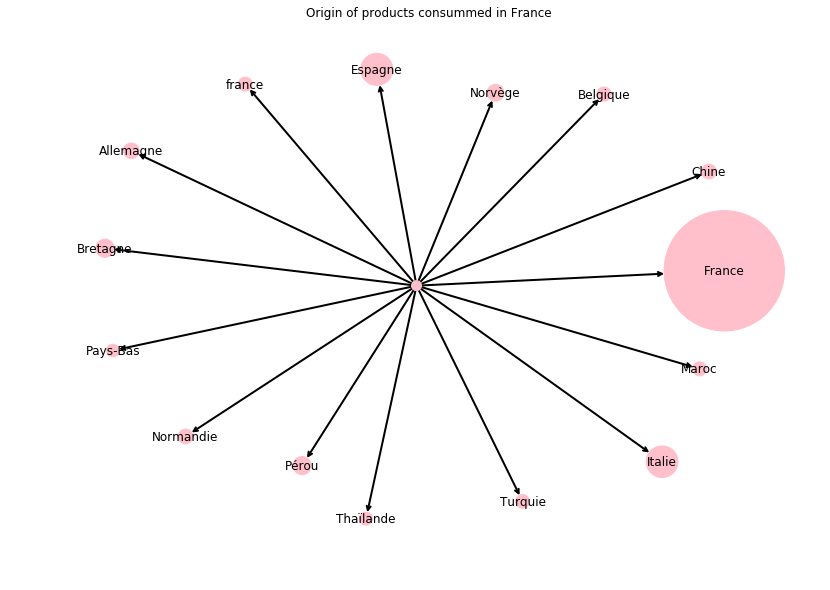

In [39]:
do_star_graph_series(top15,title="Origin of products consummed in France",save_under='img/origin_food_france_network.png')


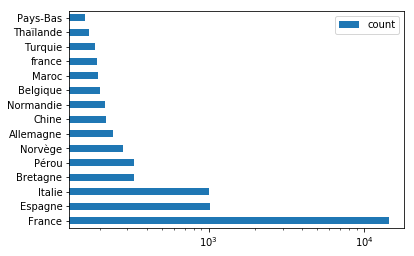

In [41]:
top15.plot.barh(logx=True)
plt.savefig("img/origin_food_france_histo.png",bbox_inches='tight')

# Origin by category now

In [42]:
z = origins_france.join(data,lsuffix='l',rsuffix='r')

In [43]:
z = z[["categories_en"]]
z = z["categories_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
z = z.reset_index().set_index('code')
z.columns = ['','categories_en']
categories_split = z[['categories_en']]

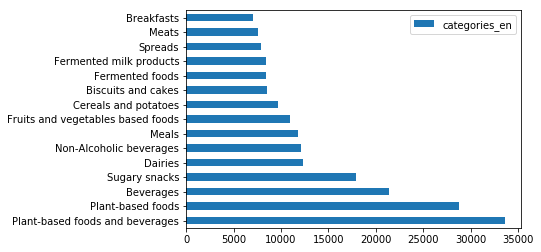

In [44]:
by_cat_france = categories_split["categories_en"].value_counts().to_frame()
by_cat_15 = by_cat_france.nlargest(15,'categories_en')
by_cat_15.plot.barh()
plt.savefig("img/by_category_top_15_origin.png",bbox_inches='tight')
plt.show()

------
Plant-based foods and beverages


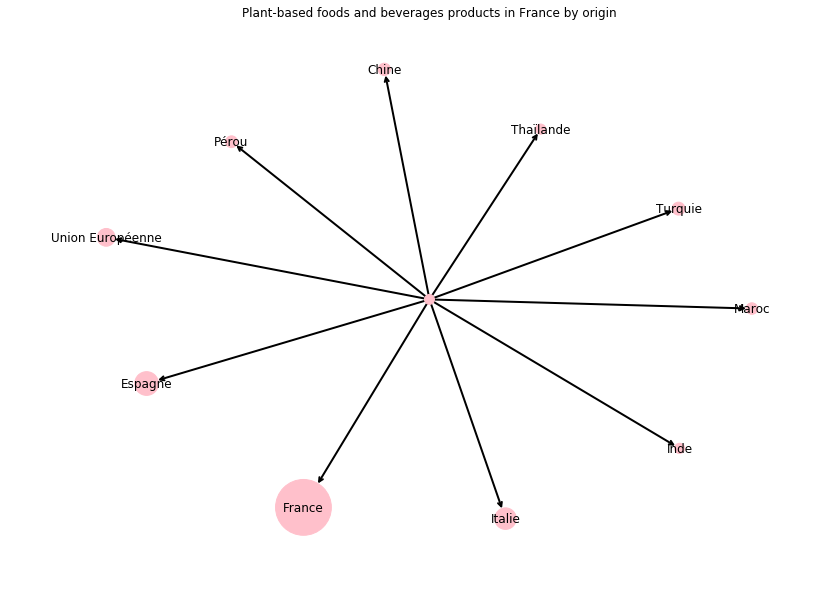

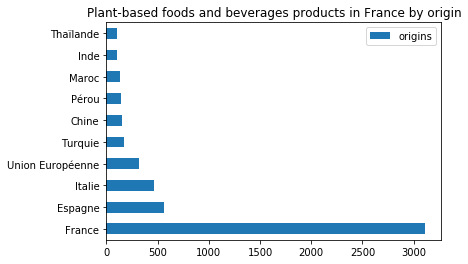

-----------
------
Plant-based foods


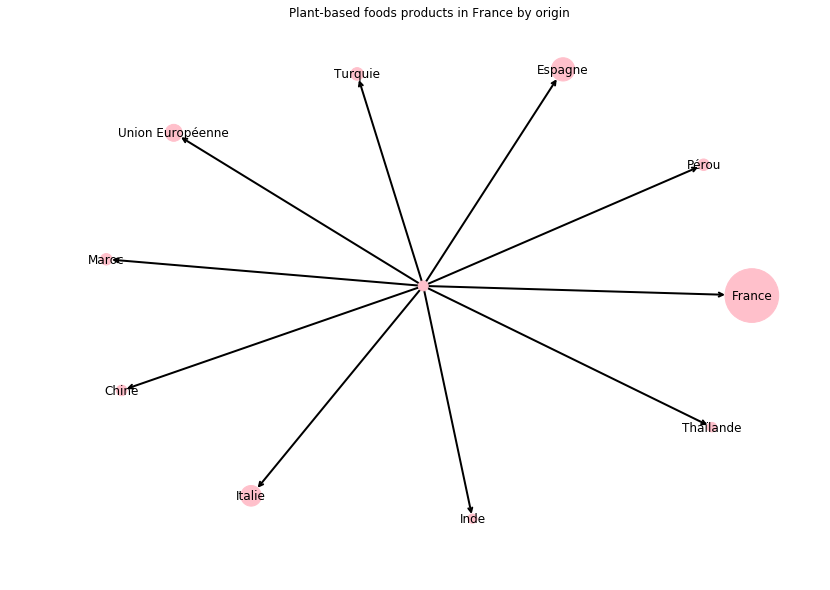

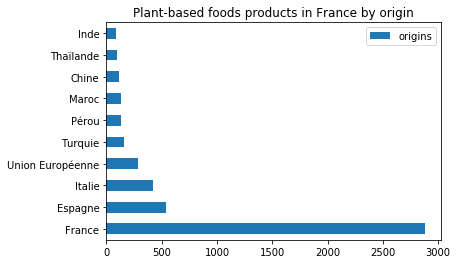

-----------
------
Beverages


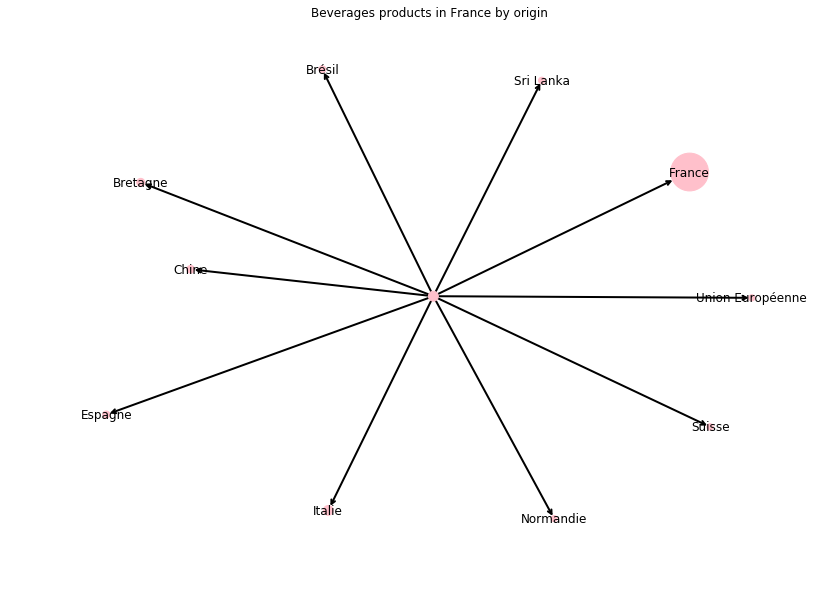

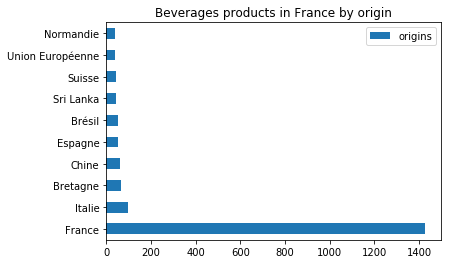

-----------
------
Sugary snacks


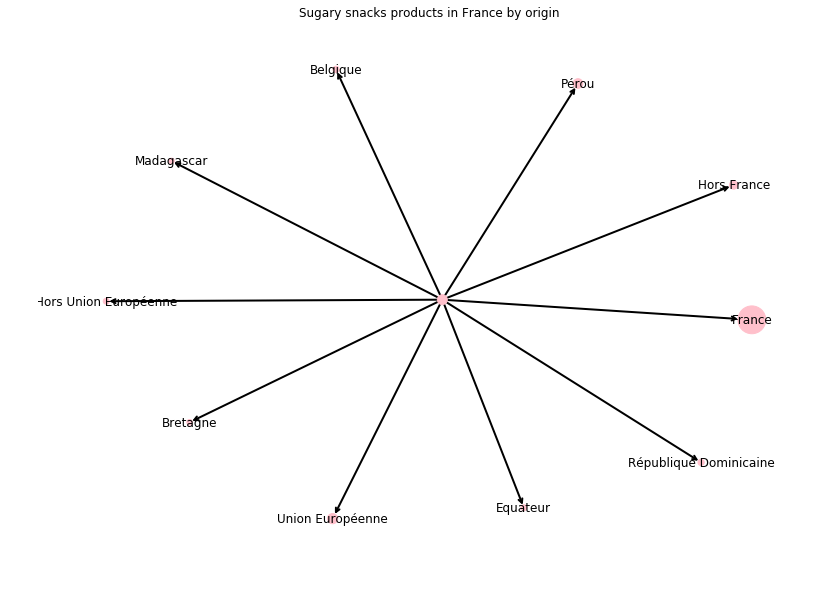

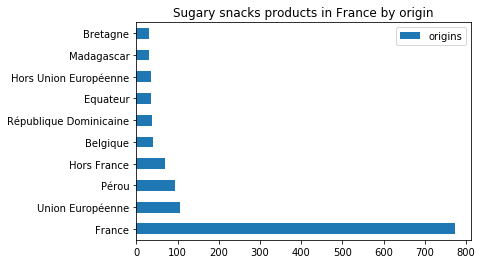

-----------
------
Dairies


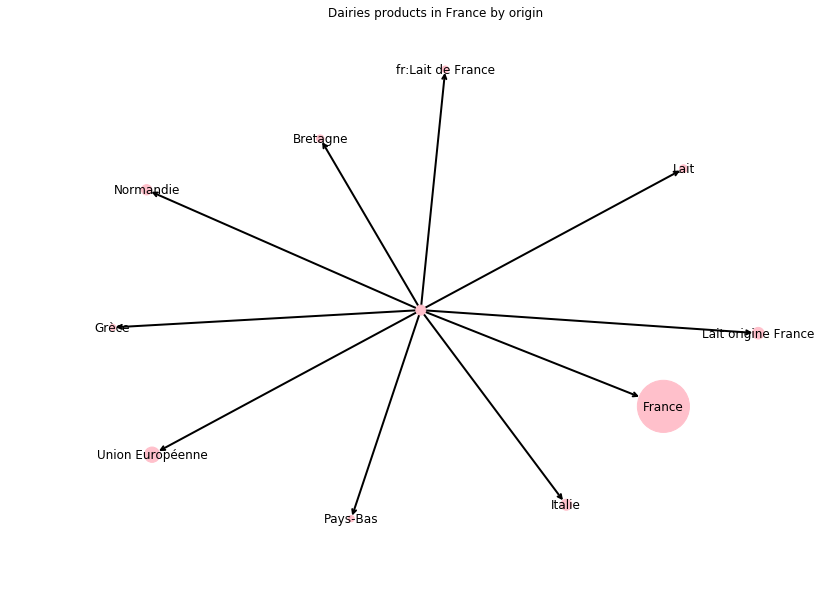

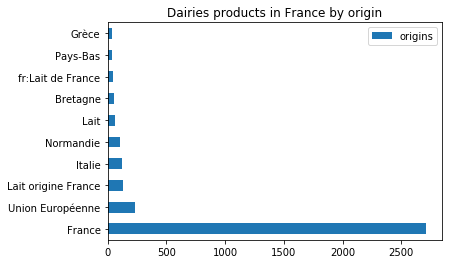

-----------
------
Non-Alcoholic beverages


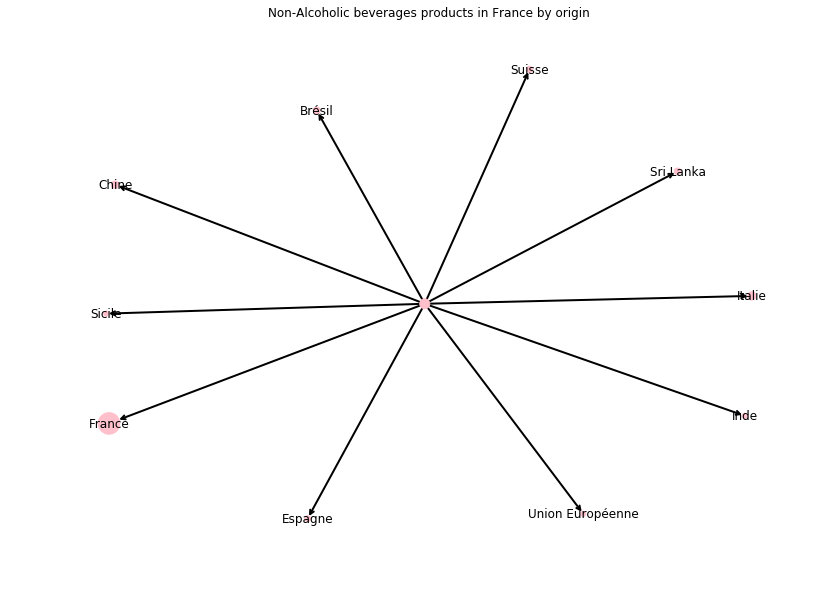

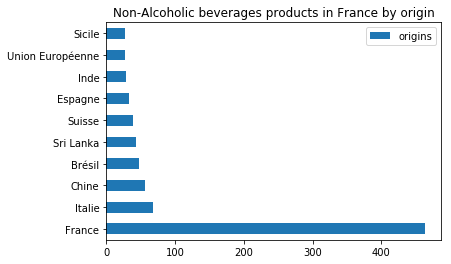

-----------
------
Meals


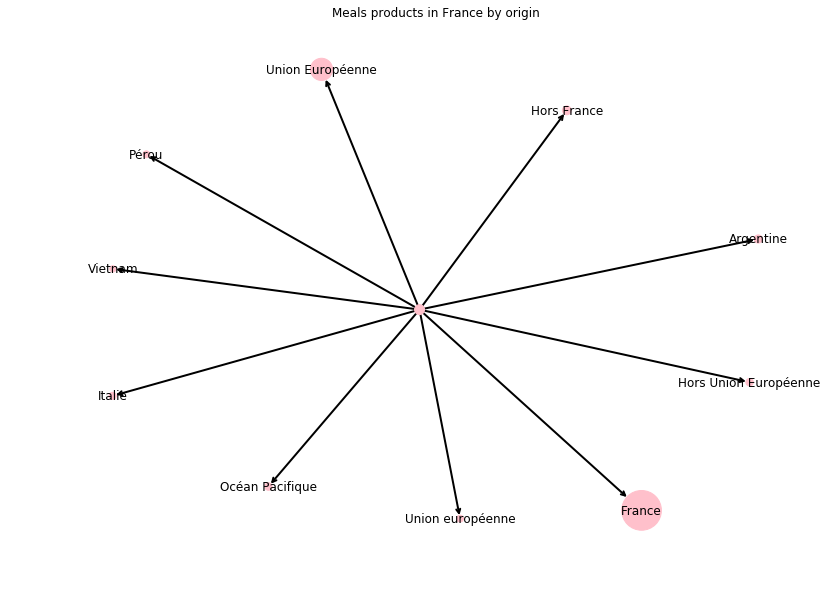

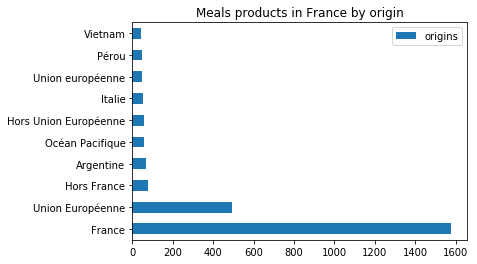

-----------
------
Fruits and vegetables based foods


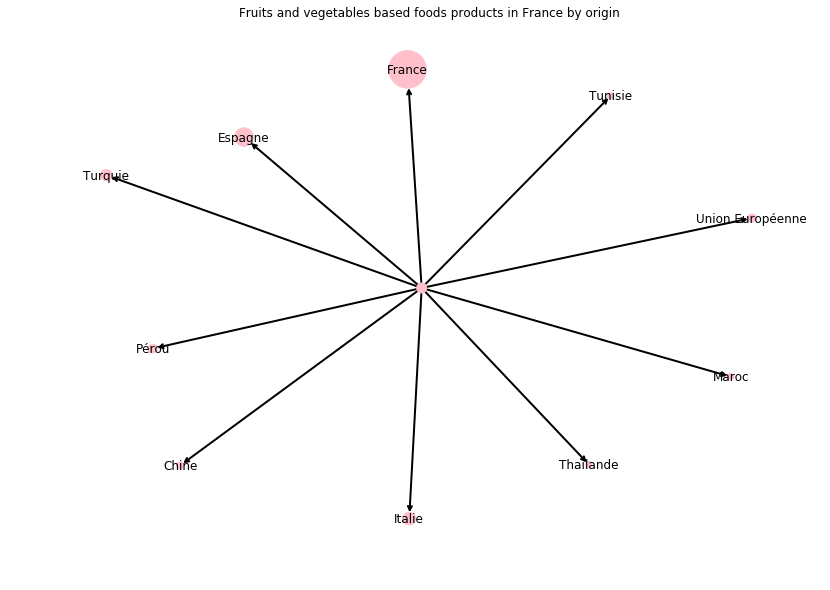

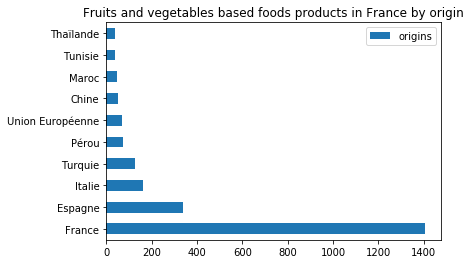

-----------
------
Cereals and potatoes


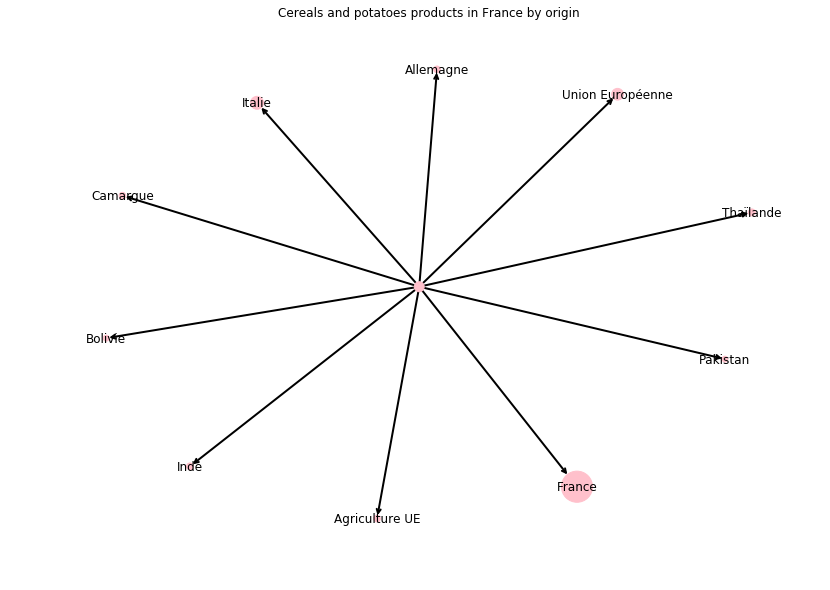

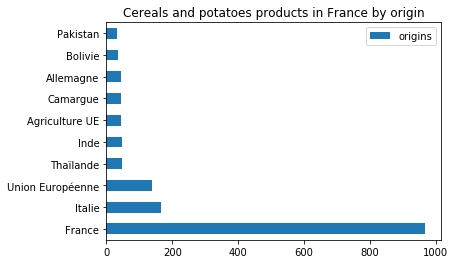

-----------
------
Biscuits and cakes


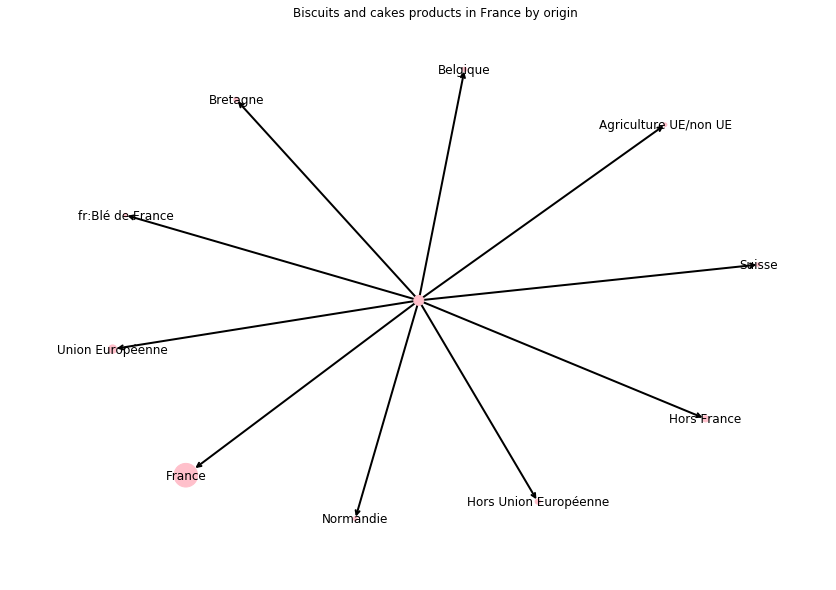

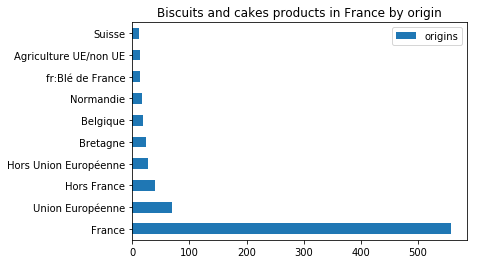

-----------
------
Fermented foods


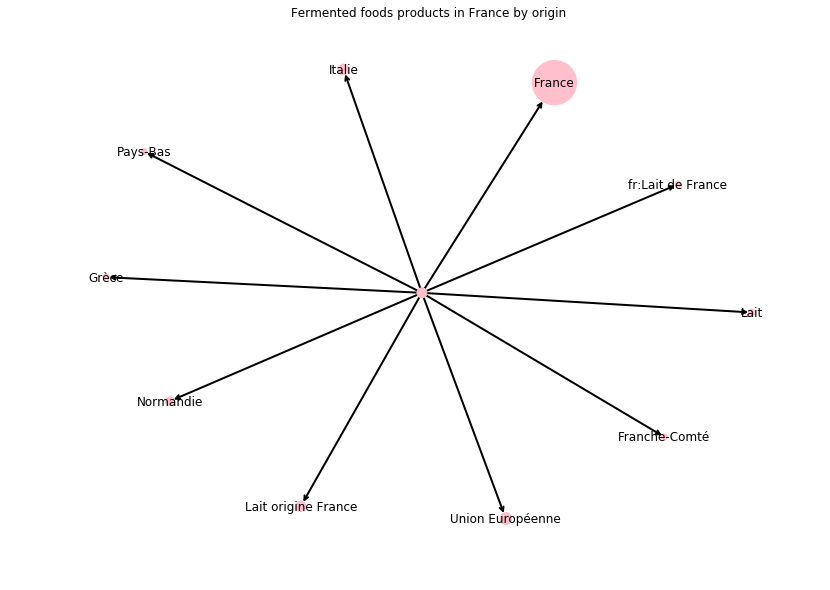

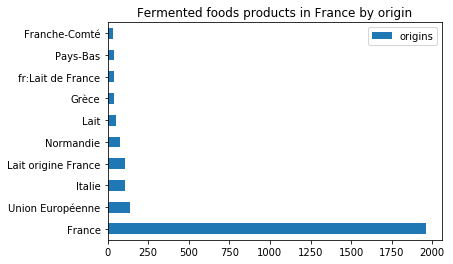

-----------
------
Fermented milk products


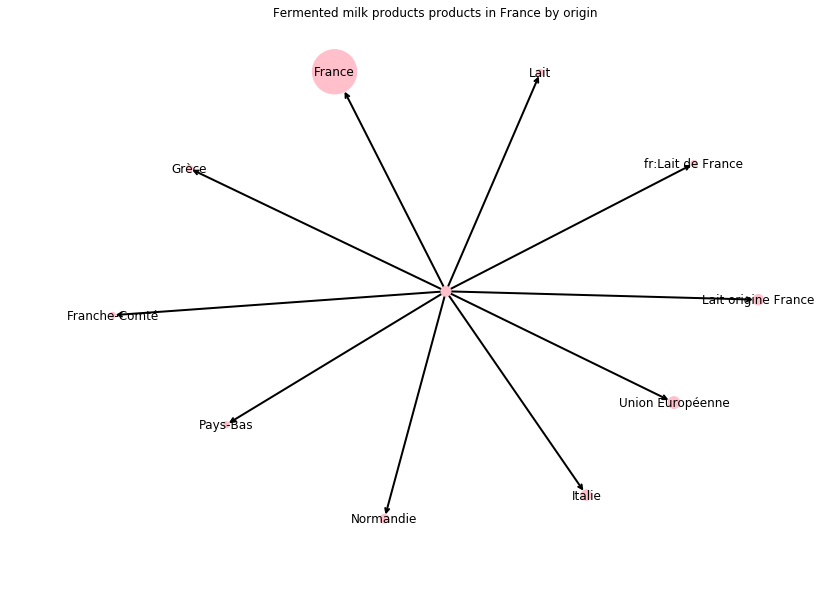

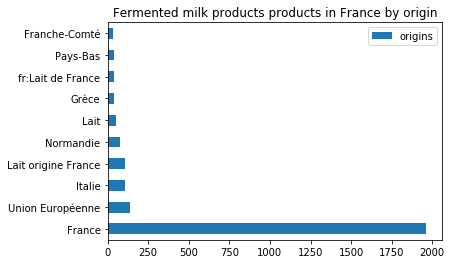

-----------
------
Spreads


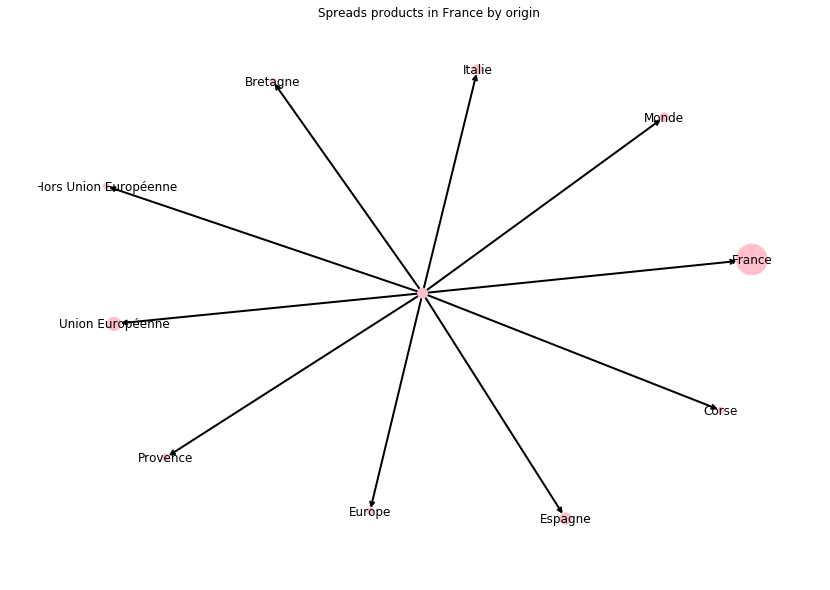

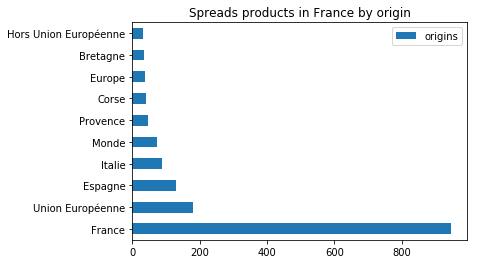

-----------
------
Meats


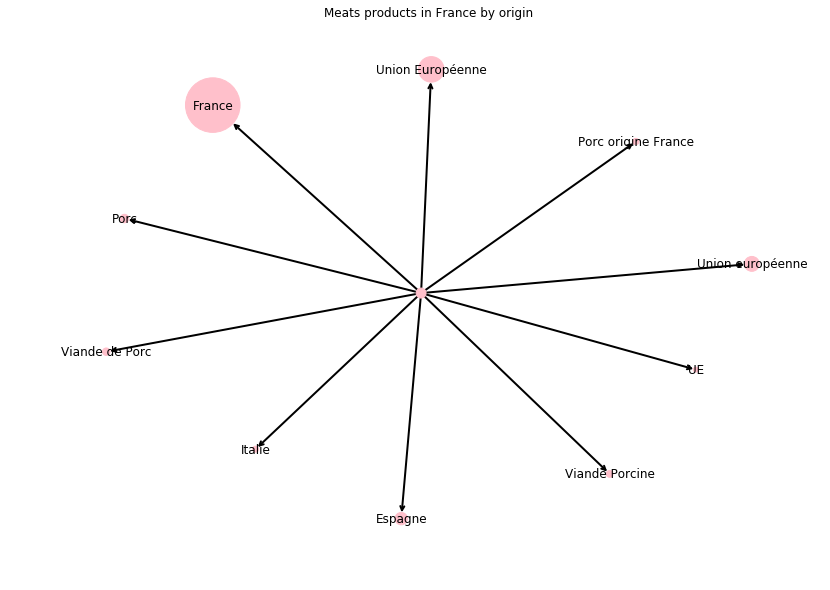

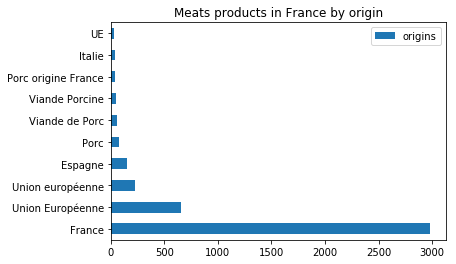

-----------
------
Breakfasts


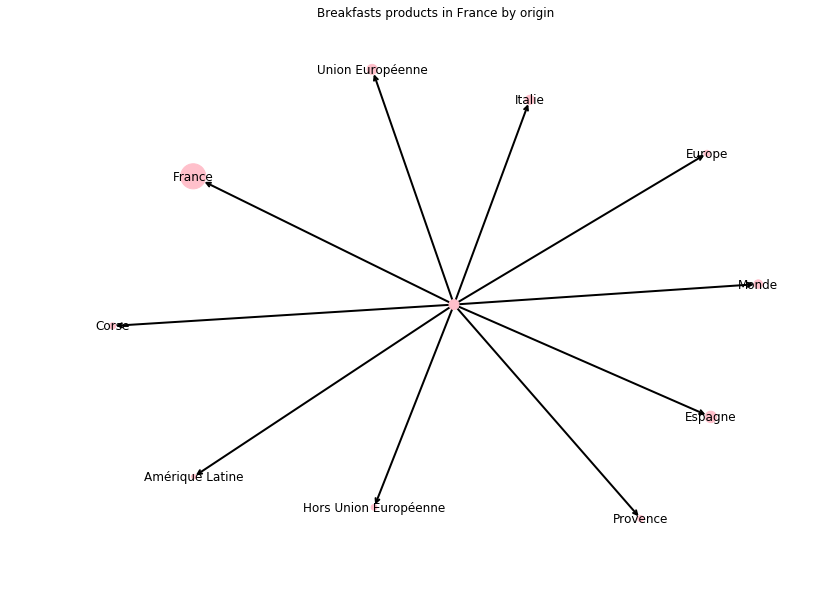

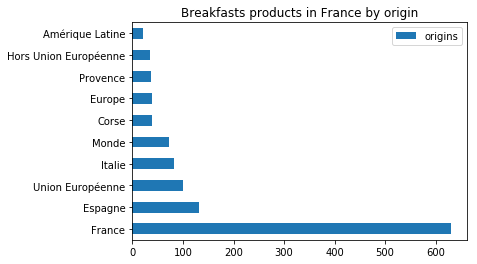

-----------


In [49]:
## For each main categories do a cutie network graph like above to see if we have any trends :) 
for cat in by_cat_15.index:
    print("------")

    print(cat)
    cat_pd = categories_split[cat ==  categories_split["categories_en"]]
    origin_cat = cat_pd.join(origins_split)
    top10 = origin_cat["origins"].value_counts().to_frame().nlargest(10,"origins")
    do_star_graph_series(top10,mode='node',title=cat+" products in France by origin",save_under="img/"+cat+"_network.png")
    top10.plot.barh()
    plt.title(cat+ " products in France by origin")
    plt.savefig("img/"+cat+"_histogram.png",bbox_inches='tight')

    plt.show()
    print("-----------")